In [1]:
# Import Packages, Function and Classes

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Read the Cancer Dataset file

cancer = load_breast_cancer()
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [18]:
# Divide the data into"Attributes" and "labels"

x_data = cancer.data[:,:1] # mean radius
labels = cancer.target
x_data
# type(x_data)
# type(labels)

array([[17.99 ],
       [20.57 ],
       [19.69 ],
       [11.42 ],
       [20.29 ],
       [12.45 ],
       [18.25 ],
       [13.71 ],
       [13.   ],
       [12.46 ],
       [16.02 ],
       [15.78 ],
       [19.17 ],
       [15.85 ],
       [13.73 ],
       [14.54 ],
       [14.68 ],
       [16.13 ],
       [19.81 ],
       [13.54 ],
       [13.08 ],
       [ 9.504],
       [15.34 ],
       [21.16 ],
       [16.65 ],
       [17.14 ],
       [14.58 ],
       [18.61 ],
       [15.3  ],
       [17.57 ],
       [18.63 ],
       [11.84 ],
       [17.02 ],
       [19.27 ],
       [16.13 ],
       [16.74 ],
       [14.25 ],
       [13.03 ],
       [14.99 ],
       [13.48 ],
       [13.44 ],
       [10.95 ],
       [19.07 ],
       [13.28 ],
       [13.17 ],
       [18.65 ],
       [ 8.196],
       [13.17 ],
       [12.05 ],
       [13.49 ],
       [11.76 ],
       [13.64 ],
       [11.94 ],
       [18.22 ],
       [15.1  ],
       [11.52 ],
       [19.21 ],
       [14.71 ],
       [13.05 

In [4]:
# Split 80% of the data to the training set while 20% of the data to test set

X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.2, random_state=0)

In [5]:
# Create a Model and Train it

model = LogisticRegression(solver='liblinear', random_state=0)
H = model.fit(X_train, y_train)

# model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

In [6]:
# Getting Results

print('Logistic Regression Model Coeff (m) =' , model.coef_)
print('Logistic Regression Model Coeff (b) =' , model.intercept_)

Logistic Regression Model Coeff (m) = [[-0.49524206]]
Logistic Regression Model Coeff (b) = [7.54061572]


In [7]:
# Predicting the data

y_predict=model.predict(X_test)
print(y_predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1]


Text(0.5, 1.0, 'Logistic Regression Model')

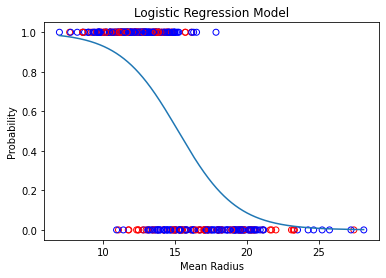

In [8]:
# Scatter plot for Logistic Regression Model

colors = {0:'red', 1:'blue'}
def sigmoid(x):
    return (1 / (1 +np.exp(-(model.intercept_[0] +(model.coef_[0][0] * x)))))
x1 = np.arange(np.min(X_train), np.max(X_train), 0.01)
y1 = [sigmoid(n) for n in x1]
plt.scatter(X_train,y_train,facecolors='none',edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda X_train:colors[X_train]),cmap=colors)
plt.plot(x1,y1)
plt.xlabel("Mean Radius")
plt.ylabel("Probability")
plt.title('Logistic Regression Model')

In [14]:
type(X_train)

numpy.ndarray

In [10]:
# Evaluate the Model

print("\nPrediction Probability : \n",model.predict_proba(X_test))

print("\nPrediction : ",model.predict(X_test))

print("\nScore : ",model.score(X_test, y_test))


Prediction Probability : 
 [[0.28815287 0.71184713]
 [0.26924273 0.73075727]
 [0.35495662 0.64504338]
 [0.38261492 0.61738508]
 [0.25206829 0.74793171]
 [0.12735274 0.87264726]
 [0.17179642 0.82820358]
 [0.14851656 0.85148344]
 [0.02382539 0.97617461]
 [0.07875153 0.92124847]
 [0.43400977 0.56599023]
 [0.42551428 0.57448572]
 [0.05280865 0.94719135]
 [0.6898163  0.3101837 ]
 [0.4279373  0.5720627 ]
 [0.52892432 0.47107568]
 [0.04467502 0.95532498]
 [0.93193494 0.06806506]
 [0.89485926 0.10514074]
 [0.94426261 0.05573739]
 [0.1574998  0.8425002 ]
 [0.62295633 0.37704367]
 [0.29531567 0.70468433]
 [0.1574998  0.8425002 ]
 [0.95446663 0.04553337]
 [0.16350487 0.83649513]
 [0.10503629 0.89496371]
 [0.32279815 0.67720185]
 [0.28815287 0.71184713]
 [0.85259212 0.14740788]
 [0.23208687 0.76791313]
 [0.93379578 0.06620422]
 [0.26247677 0.73752323]
 [0.61360614 0.38639386]
 [0.06192253 0.93807747]
 [0.22081103 0.77918897]
 [0.27512902 0.72487098]
 [0.86634062 0.13365938]
 [0.45479412 0.5452058

In [11]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, model.predict(X_test)))


Confusion Matrix : 
 [[35 12]
 [ 1 66]]


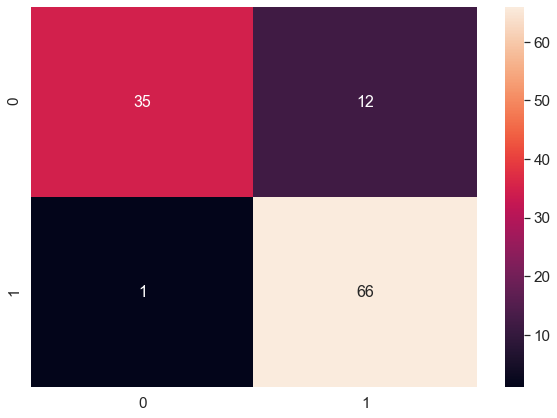

In [12]:
# Plot Confusion Matrix 

cm = confusion_matrix(y_test, model.predict(X_test))

import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()


In [13]:
# Print Classification Report

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84        47
           1       0.85      0.99      0.91        67

    accuracy                           0.89       114
   macro avg       0.91      0.86      0.88       114
weighted avg       0.90      0.89      0.88       114

